# BEE 4750 Homework 4: Linear Programming and Capacity Expansion

**Name**: MacKenzie Fountain

**ID**: 5362163

> **Due Date**
>
> Thursday, 11/07/23, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to formulate and solve a resource allocation
    problem using linear programming.
-   Problem 2 asks you to formulate, solve, and analyze a standard
    generating capacity expansion problem.
-   Problem 3 (5750 only) asks you to add a CO<sub>2</sub> constraint to
    the capacity expansion problem and identify changes in the resulting
    solution.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [3]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/BEE 4750/hw4-grape`


In [4]:
using JuMP
using HiGHS
using DataFrames
using Plots
using Measures
using CSV
using MarkdownTables

In [5]:
2900*.36
3800*.36-70
4400*.36-70
3500*.27
4100*.27-70
4200*.27-70
5900*.22
6700*.22-70
7900*.22-70

1668.0

## Problems (Total: 50/60 Points)

### Problem 1 (20 points)

A farmer has access to a pesticide which can be used on corn, soybeans,
and wheat fields, and costs \$70/ha-yr to apply. The crop yields the
farmer can obtain following crop yields by applying varying rates of
pesticides to the field are shown in
<a href="#tbl-yields" class="quarto-xref">Table 1</a>.

| Application Rate (kg/ha) | Soybean (kg/ha) | Wheat (kg/ha) | Corn (kg/ha) |
|:------------------------:|:---------------:|:-------------:|:------------:|
|            0             |      2900       |     3500      |     5900     |
|            1             |      3800       |     4100      |     6700     |
|            2             |      4400       |     4200      |     7900     |

Table 1: Crop yields from applying varying pesticide rates for Problem
1.

The costs of production, *excluding pesticides*, for each crop, and
selling prices, are shown in
<a href="#tbl-costs" class="quarto-xref">Table 2</a>.

|   Crop   | Production Cost (\$/ha-yr) | Selling Price (\$/kg) |
|:--------:|:--------------------------:|:---------------------:|
| Soybeans |            350             |         0.36          |
|  Wheat   |            280             |         0.27          |
|   Corn   |            390             |         0.22          |

Table 2: Costs of crop production, excluding pesticides, and selling
prices for each crop.

Recently, environmental authorities have declared that farms cannot have
an *average* application rate on soybeans, wheat, and corn which exceeds
0.8, 0.7, and 0.6 kg/ha, respectively. The farmer has asked you for
advice on how they should plant crops and apply pesticides to maximize
profits over 130 total ha while remaining in regulatory compliance if
demand for each crop (which is the maximum the market would buy) this
year is 250,000 kg?

**In this problem**:

-   Formulate a linear program for this resource allocation problem,
    including clear definitions of decision variable(s) (including
    units), objective function(s), and constraint(s) (make sure to
    explain functions and constraints with any needed derivations and
    explanations). **Tip: Make sure that all of your constraints are
    linear**.
-   Implement the program in `JuMP.jl` and find the solution. How many
    ha should the farmer dedicate to each crop and with what pesticide
    application rate(s)? How much profit will the farmer expect to make?
-   The farmer has an opportunity to buy an extra 10 ha of land. How
    much extra profit would this land be worth to the farmer? Discuss
    why this value makes sense and whether you would recommend the
    farmer should make the purchase.


In [6]:
m = Model(HiGHS.Optimizer)

@variable(m, S[0:2] >= 0)
@variable(m, W[0:2] >= 0)
@variable(m, C[0:2] >= 0)

@objective(m, Max, 1044S[0]+1298S[1]+1514S[2]+945W[0]+1037W[1]+1064W[2]+1298C[0]+1404C[1]+1668C[2])

#cannot grow more crops than demand, will not sell crops over 250000kg
@constraint(m, (2900*S[0]+3800*S[1]+4400*S[2]) <= 250000) 
@constraint(m, (3500*W[0]+4100*W[1]+4200*W[2]) <= 250000) 
@constraint(m, (5900*C[0]+6700*C[1]+7900*C[2]) <= 250000) 

#Optimizing crops to not exceed 130 ha
@constraint(m, S[0]+S[1]+S[2]+W[0]+W[1]+W[2]+C[0]+C[1]+C[2] <= 130) 

#Cannot exceed environmental regulations for pesticide
@constraint(m, S[1] + 2 * S[2] <= 0.8 * (S[1] + S[2] + S[0]))
@constraint(m, W[1] + 2 * W[2] <= 0.7 * (W[1] + W[2] + W[0]))
@constraint(m, C[1] + 2 * C[2] <= 0.6 * (C[1] + C[2] + C[0]))

-0.6 C[0] + 0.4 C[1] + 1.4 C[2] ≤ 0

In [7]:
optimize!(m)


Running HiGHS 1.7.2 (git hash: 5ce7a2753): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e-01, 8e+03]
  Cost   [9e+02, 2e+03]
  Bound  [0e+00, 0e+00]
  RHS    [1e+02, 2e+05]
Presolving model
7 rows, 9 cols, 27 nonzeros  0s
7 rows, 9 cols, 27 nonzeros  0s
Presolve : Reductions: rows 7(-0); columns 9(-0); elements 27(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -2.5482792166e+02 Ph1: 7(28.3601); Du: 9(254.828) 0s
          8     1.6301388270e+05 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 8
Objective value     :  1.6301388270e+05
HiGHS run time      :          0.00


In [8]:
#@show value.(S);
#@show value.(W);
#@show value.(C);

In [9]:
#calculate profit
@show objective_value(m);

objective_value(m) = 163013.88270293243


In [10]:
t = Model(HiGHS.Optimizer)

@variable(t, S[0:2] >= 0)
@variable(t, W[0:2] >= 0)
@variable(t, C[0:2] >= 0)

@objective(t, Max, 1044S[0]+1298S[1]+1514S[2]+945W[0]+1037W[1]+1064W[2]+1298C[0]+1404C[1]+1668C[2])

#cannot grow more crops than demand, will not sell crops over 250000kg
@constraint(t, (2900*S[0]+3800*S[1]+4400*S[2]) <= 250000) 
@constraint(t, (3500*W[0]+4100*W[1]+4200*W[2]) <= 250000) 
@constraint(t, (5900*C[0]+6700*C[1]+7900*C[2]) <= 250000) 

#Optimizing crops to not exceed 130 ha
@constraint(t, S[0]+S[1]+S[2]+W[0]+W[1]+W[2]+C[0]+C[1]+C[2] <= 140) 

#Cannot exceed environmental regulations for pesticide
@constraint(t, S[1] + 2 * S[2] <= 0.8 * (S[1] + S[2] + S[0]))
@constraint(t, W[1] + 2 * W[2] <= 0.7 * (W[1] + W[2] + W[0]))
@constraint(t, C[1] + 2 * C[2] <= 0.6 * (C[1] + C[2] + C[0]))

-0.6 C[0] + 0.4 C[1] + 1.4 C[2] ≤ 0

In [11]:
optimize!(t)

Running HiGHS 1.7.2 (git hash: 5ce7a2753): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e-01, 8e+03]
  Cost   [9e+02, 2e+03]
  Bound  [0e+00, 0e+00]
  RHS    [1e+02, 2e+05]
Presolving model
7 rows, 9 cols, 27 nonzeros  0s
7 rows, 9 cols, 27 nonzeros  0s
Presolve : Reductions: rows 7(-0); columns 9(-0); elements 27(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -2.5482792166e+02 Ph1: 7(28.3601); Du: 9(254.828) 0s
          8     1.7310788270e+05 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 8
Objective value     :  1.7310788270e+05
HiGHS run time      :          0.00


In [12]:
AdditionalProfit = objective_value(t) - objective_value(m)

10094.0

I would recommned the farmer buy this land, because he makes profit.


### Problem 2 (30 points)

For this problem, we will use hourly load (demand) data from 2013 in New
York’s Zone C (which includes Ithaca). The load data is loaded and
plotted below in <a href="#fig-demand" class="quarto-xref">Figure 1</a>.

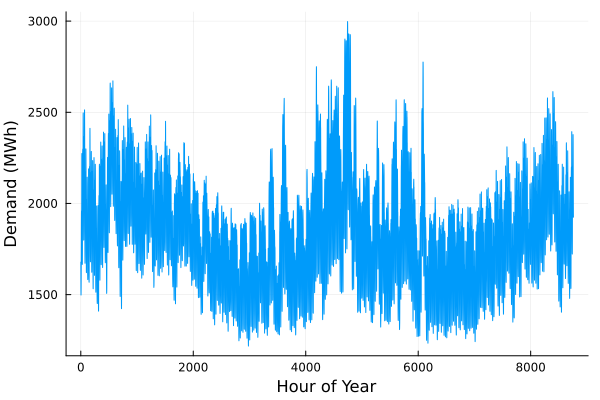

In [13]:
# load the data, pull Zone C, and reformat the DataFrame
NY_demand = DataFrame(CSV.File("data/2013_hourly_load_NY.csv"))
rename!(NY_demand, :"Time Stamp" => :Date)
demand = NY_demand[:, [:Date, :C]]
rename!(demand, :C => :Demand)
demand[:, :Hour] = 1:nrow(demand)

# plot demand
plot(demand.Hour, demand.Demand, xlabel="Hour of Year", ylabel="Demand (MWh)", label=:false)

Next, we load the generator data, shown in
<a href="#tbl-generators" class="quarto-xref">Table 3</a>. This data
includes fixed costs (\$/MW installed), variable costs (\$/MWh
generated), and CO<sub>2</sub> emissions intensity (tCO<sub>2</sub>/MWh
generated).

In [14]:
gens = DataFrame(CSV.File("data/generators.csv"))

6×4 DataFrame
 Row │ Plant       FixedCost  VarCost  Emissions 
     │ String15    Int64      Int64    Float64   
─────┼───────────────────────────────────────────
   1 │ Geothermal     450000        0       0.0
   2 │ Coal           220000       24       1.0
   3 │ NG CCGT         82000       30       0.43
   4 │ NG CT           65000       40       0.55
   5 │ Wind            91000        0       0.0
   6 │ Solar           70000        0       0.0

Finally, we load the hourly solar and wind capacity factors, which are
plotted in <a href="#fig-cf" class="quarto-xref">Figure 2</a>. These
tell us the fraction of installed capacity which is expected to be
available in a given hour for generation (typically based on the average
meteorology).

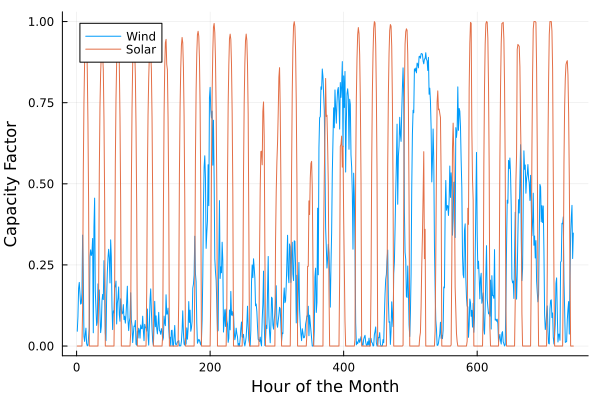

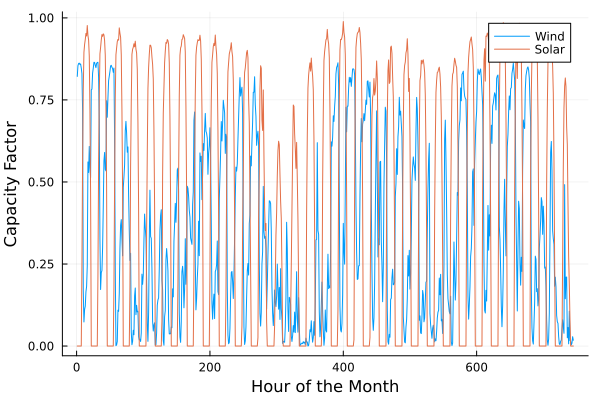

In [15]:
# load capacify factors into a DataFrame
cap_factor = DataFrame(CSV.File("data/wind_solar_capacity_factors.csv"))

# plot January capacity factors
p1 = plot(cap_factor.Wind[1:(24*31)], label="Wind")
plot!(cap_factor.Solar[1:(24*31)], label="Solar")
xaxis!("Hour of the Month")
yaxis!("Capacity Factor")

p2 = plot(cap_factor.Wind[4344:4344+(24*31)], label="Wind")
plot!(cap_factor.Solar[4344:4344+(24*31)], label="Solar")
xaxis!("Hour of the Month")
yaxis!("Capacity Factor")

display(p1)
display(p2)

You have been asked to develop a generating capacity expansion plan for
the utility in Riley County, NY, which currently has no existing
electrical generation infrastructure. The utility can build any of the
following plant types: geothermal, coal, natural gas combined cycle gas
turbine (CCGT), natural gas combustion turbine (CT), solar, and wind.

While coal, CCGT, and CT plants can generate at their full installed
capacity, geothermal plants operate at maximum 85% capacity, and solar
and wind available capacities vary by the hour depend on the expected
meteorology. The utility will also penalize any non-served demand at a
rate of \$10,000/MWh.

**In this problem**:

-   Formulate a linear program for this capacity expansion problem,
    including clear definitions of decision variable(s) (including
    units), objective function(s), and constraint(s) (make sure to
    explain functions and constraints with any needed derivations and
    explanations).
-   Implement your linear program in `JuMP.jl`. Find the optimal
    solution. How much should the utility build of each type of
    generating plant? What will the total cost be? How much energy will
    be non-served?
-   What fraction of annual generation does each plant type produce? How
    does this compare to the breakdown of built capacity that you found
    in Problem 1.5? Do these results make sense given the generator
    data?
-   Make a plot of the electricity price in each hour. Discuss any
    trends that you see.

> **Significant Digits**
>
> Use `round(x; digits=n)` to report values to the appropriate
> precision! If your number is on a different order of magnitude and you
> want to round to a certain number of significant digits, you can use
> `round(x; sigdigits=n)`.

> **Getting Variable Output Values**
>
> `value.(x)` will report the values of a `JuMP` variable `x`, but it
> will return a special container which holds other information about
> `x` that is useful for `JuMP`. This means that you can’t use this
> output directly for further calculations. To just extract the values,
> use `value.(x).data`.

> **Suppressing Model Command Output**
>
> The output of specifying model components (variable or constraints)
> can be quite large for this problem because of the number of time
> periods. If you end a cell with an `@variable` or `@constraint`
> command, I *highly* recommend suppressing output by adding a
> semi-colon after the last command, or you might find that your
> notebook crashes.


In [16]:
# define sets
G = 1:nrow(gens[1:end, :])
T = 1:nrow(demand)
NSECost = 10000;
c = Matrix(cap_factor);


In [17]:

RC_model = Model(HiGHS.Optimizer)
# define variables
@variables(RC_model, begin
    x[g in G] >= 0
    y[g in G, t in T] >= 0
    NSE[t in T] >= 0
end)

@objective(RC_model, Min, 
    sum(gens[G, :FixedCost] .* x) + sum(gens[G, :VarCost] .* sum(y[:, t] for t in T)) + NSECost * sum(NSE)
)

@constraint(RC_model, load[t in T], sum(y[:, t]) + NSE[t] >= demand.Demand[t])
@constraint(RC_model, availability[g in G, t in T], y[g, t] <= x[g])

# define sets
G = 1:2 # num_gen is the number of generators
T = 1:200 # number of time periods

 #c = G x T matrix of capacity factors  
#@constraint(c, capacity[g in G, t in T], 
    #y[g,t] <= x[g] * c[g,t]) # capacity constraint
#@constraint(RC_model, capacity[g in G, t in T], y[g, t] <= x[g] * c[t, g])


1:200

In [20]:
optimize!(RC_model)


Running HiGHS 1.7.2 (git hash: 5ce7a2753): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [2e+01, 4e+05]
  Bound  [0e+00, 0e+00]
  RHS    [1e+03, 3e+03]
Presolving model
61320 rows, 61326 cols, 166440 nonzeros  0s
61317 rows, 61323 cols, 166434 nonzeros  0s
Presolve : Reductions: rows 61317(-3); columns 61323(-3); elements 166434(-6)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 8760(1.63679e+07) 0s
      29491     2.0595172800e+08 Pr: 0(0) 1s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 29491
Objective value     :  2.0595172800e+08
HiGHS run time      :          1.32


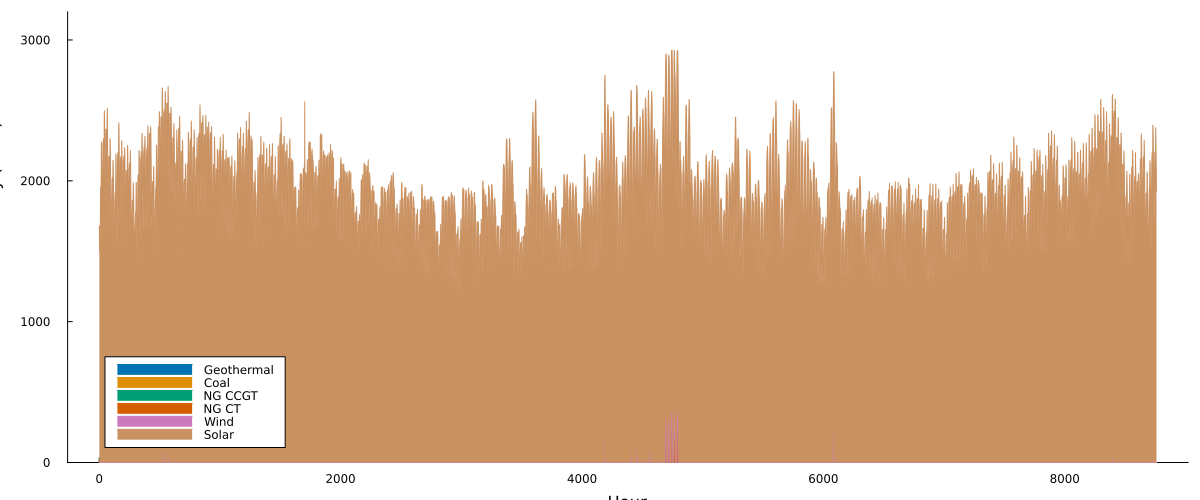

In [21]:
p = areaplot(value.(y).data', 
    label=permutedims(gens.Plant), 
    xlabel = "Hour", 
    ylabel ="Generated Electricity (MWh)", 
    color_palette=:seaborn_colorblind,
    grid=:false,
    legend = :bottomleft)
ylims!(p, (0, 3200))
plot!(p, size=(1200, 500))


### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

The NY state legislature is considering enacting an annual
CO<sub>2</sub> limit, which for the utility would limit the emissions in
its footprint to 1.5 MtCO<sub>2</sub>/yr.

**In this problem**:

-   Reformulate your linear program from Problem 2 with any necessary
    changes to capture the CO<sub>2</sub> limit.
-   Implement the new optimization problem and find the optimal
    solution. How much should the utility build of each type of
    generating plant? What is different from your plan from Problem 1?
    Do these changes make sense?
-   What would the value to the utility be of allowing it to emit an
    additional 1000 tCO<sub>2</sub>/yr? An additional 5000?

## References

List any external references consulted, including classmates.